In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

# Question 2

In [2]:
#Reading the data and ensuring it looks good
inputData = pd.read_csv('output_nt_Energy_10GeVex500.csv',comment='#',
                        names=['TrueEnergy','Layer1','Layer2','Layer3','Layer4','Layer5'])

E_true = float(inputData.TrueEnergy[1]) #First entry is the true energy (same for all particles)
print(inputData)

     TrueEnergy    Layer1   Layer2   Layer3    Layer4    Layer5
0         10000   910.286  2871.81  1562.94   417.832  122.4210
1         10000  1013.500  1281.41  1517.82  1653.060  599.0090
2         10000   928.108  2851.96  1488.27   548.759  148.7240
3         10000   825.322  2419.05  2002.03   643.102  192.5750
4         10000   853.021  2419.50  1735.58   725.197  163.9160
..          ...       ...      ...      ...       ...       ...
495       10000  1313.720  2484.48  1596.91   455.408  108.6770
496       10000   500.081  1875.97  2635.46   796.785  215.7350
497       10000  1168.930  2798.67  1494.82   388.948  112.6830
498       10000   712.279  1983.55  1810.83   754.392  397.1660
499       10000  2449.730  2445.03  1015.31   360.921   72.3408

[500 rows x 6 columns]


In [3]:
E_det = inputData[['Layer1','Layer2','Layer3','Layer4','Layer5']].sum(axis=1) # sum over layers to get total E_det
E_det_inf = E_det[E_det != 0] #Remove all 0's to avoid divide by 0 error
E_cal = np.mean(E_true/np.asarray(E_det_inf))*E_det_inf #Calibrate the energy

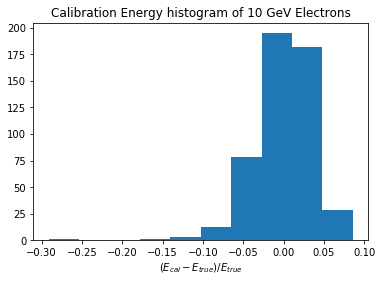

Resolution is = 0.0357


In [4]:
expression = np.asarray(E_cal-E_true)/E_true
resolution = np.std(expression)

#Plotting the histogram
plt.hist(expression)
plt.title("Calibration Energy histogram of 10 GeV Electrons")
plt.xlabel("($E_{cal}-E_{true})/E_{true}$")
plt.show()

print("Resolution is = {:.4f}".format(resolution))

## Question 3

In [5]:
#read in data and check it looks good
new_inputData = pd.read_csv(r'../varying_beam_energy/output_nt_Energy_varied.csv',comment='#',
                        names=['TrueEnergy','Layer1','Layer2','Layer3','Layer4','Layer5'])

print(new_inputData)
#Energy increases by 50 MeV so all is good

     TrueEnergy     Layer1       Layer2       Layer3    Layer4   Layer5
0            50    25.7629      2.09607      2.36628     0.000     0.00
1           100    23.5324     24.26180      7.65028     0.000     0.00
2           150    48.3301     45.12000     10.60210    10.525     0.00
3           200   119.9780     27.50540      1.27169     0.000     0.00
4           250    67.7293      5.10841      5.99660     0.000     0.00
..          ...        ...          ...          ...       ...      ...
995       49800  2569.2200   8805.07000  10943.40000  5964.620  2238.28
996       49850  2087.1300  10568.40000  10103.20000  4677.110  1691.40
997       49900  1726.1100   9775.33000  10078.70000  5842.720  1955.81
998       49950  2407.9500  11020.20000   9526.51000  5358.760  1699.64
999       50000  2399.1700   9274.76000  10509.70000  5697.090  2049.81

[1000 rows x 6 columns]


In [6]:
new_E_true = new_inputData.TrueEnergy #select the "TrueEnergy" column
new_E_det = new_inputData[['Layer1','Layer2','Layer3','Layer4','Layer5']].sum(axis=1) #sum over layers
new_E_cal = np.mean(new_E_true/np.asarray(new_E_det))*new_E_det #recalibrate the data
new_expression = (new_E_cal-new_E_true)/new_E_true #get the new expression for the histogram

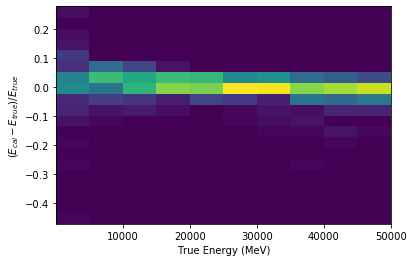

In [7]:
#plotting the 2D histogram
pl.hist2d(x=new_E_true,y=new_expression,bins=(10,20)) #10 bins along x-axis and 20 along the y-axis
pl.xlabel('True Energy (MeV)')
pl.ylabel('($E_{cal}-E_{true})/E_{true}$')
pl.show()

The beam energy values range from 50 MeV to 50 GeV with an increase of 50 MeV per step. At low energies, the detected energies are very spread out from the true energy due to the fact that most electrons barely pass through the first Lead layer. The quality of the detector peaks at around 30 GeV since the electrons get through the first layer and deposit their energy throughout the detector and, at higher energies, the detector loses its effectiveness again as the electrons have such high energies that they are able to pass through the entire calorimeter before depositing all of their energy.